# Overview of mnist dataset

In [1]:
from keras.datasets import mnist

(train_data,train_target),(test_data,test_target) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print("train_data shape : ", train_data.shape)
print("train_target shape : ", train_target.shape)
print("test_data shape : ", test_data.shape)
print("test_target shape : ", test_target.shape)

train_data shape :  (60000, 28, 28)
train_target shape :  (60000,)
test_data shape :  (10000, 28, 28)
test_target shape :  (10000,)


first data :  5

first data as a immage


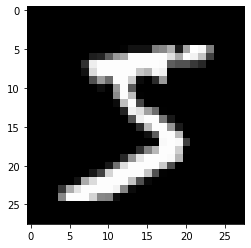

In [4]:
from matplotlib import pyplot as plt

print("first data : ", train_target[0])
#first data out of 60,000

print("\nfirst data as a immage")
plt.imshow(train_data[0],cmap='gray')
plt.show()
#display as image

# FFNN for MNIST

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
#emty NN

model.add(Flatten(input_shape=(28,28)))
#Flatter Layer converts the 2D image to a column vector

model.add(Dense(512,activation='relu'))
#1st Hidden Layer
#512 we defined just a number

model.add(Dense(256,input_dim=512,activation='relu'))
#2nd Hidden Layer

model.add(Dense(128,input_dim=256,activation='relu'))
#3rd Hidden Layer

model.add(Dense(10,input_dim=256,activation='softmax'))
#final Layer

#model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
#using gradient descent - stohastic gradient descent

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
#adaptive one

In [6]:
new_train_data = train_data/255.0 
new_test_data = test_data/255.0
#normalization 0-255 -> 0-1
#equal all ranges so can divide directly if not need to use normalizing methods 

from keras.utils import np_utils

new_train_target = np_utils.to_categorical(train_target)

In [7]:
print("test_data[0] : \n")
print(test_data[0])
print("new_test_data[0] : \n")
print(new_test_data[0])

test_data[0] : 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 2

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [9]:
train_info = model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 30s 507us/step - loss: 0.1960 - accuracy: 0.9402
Epoch 2/20
60000/60000 [==============================] - 29s 485us/step - loss: 0.0884 - accuracy: 0.9732
Epoch 3/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.0628 - accuracy: 0.9808
Epoch 4/20
60000/60000 [==============================] - 29s 490us/step - loss: 0.0495 - accuracy: 0.9841
Epoch 5/20
60000/60000 [==============================] - 30s 505us/step - loss: 0.0378 - accuracy: 0.9882
Epoch 6/20
60000/60000 [==============================] - 29s 489us/step - loss: 0.0325 - accuracy: 0.9899
Epoch 7/20
60000/60000 [==============================] - 30s 507us/step - loss: 0.0279 - accuracy: 0.9915
Epoch 8/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.0252 - accuracy: 0.9922
Epoch 9/20
60000/60000 [==============================] - 29s 490us/step - loss: 0.0219 - accuracy: 0.9933
Epoch 10/20
60000/60000 [============

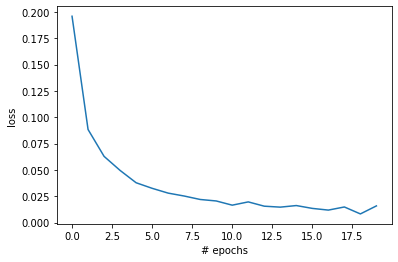

In [10]:
from matplotlib import pyplot as plt

plt.plot(train_info.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

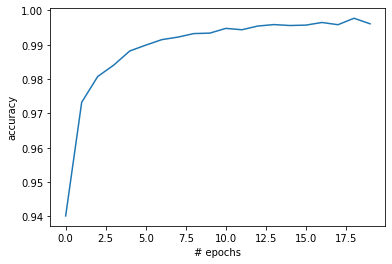

In [12]:
from matplotlib import pyplot as plt

plt.plot(train_info.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [13]:
new_test_target = np_utils.to_categorical(test_target)

print(model.evaluate(new_test_data,new_test_target))
#testing accuracy, testing and evaluate that

10000/10000 [==============================] - 1s 82us/step
[0.11734808079814639, 0.9793000221252441]


In [14]:
model.save_weights('MNIST_WEIGHTS_V2.h5')